In [1]:
#First we import everything
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np
import re
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [2]:
df_churndata = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df_churndata.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

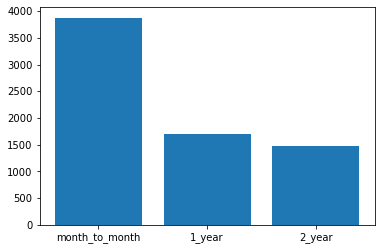

In [3]:
# plt.hist(df_churndata1.Contract)

contract_month_to_month = (df_churndata['Contract'].value_counts())
x = ['month_to_month', '1_year', '2_year']
plt.bar(x, contract_month_to_month)
contract_month_to_month

In [11]:
#I want to find out Churn data in each Contract type

churn_yes = df_churndata['Churn'] == 'Yes'
month_to_month_yes = df_churndata[churn_yes]
# Contract_month2month = 


In [18]:
m2m = month_to_month_yes['Contract'] == 'Month-to-month'
month_to_month_yes[m2m].Contract.value_counts()

Month-to-month    1655
Name: Contract, dtype: int64

In [ ]:
#Contract Pie chart month to month



